#### Importar as bibliotecas

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import skew, kurtosis, mode

#### Dataframe (criando as variáveis e visualizando os dados)

In [82]:
# Carregando o dataframe a partir do arquivo CSV
df = pd.read_csv('grupo9_projeto9.csv', sep=';')

print(df.to_string())  # Mostra todas as linhas e colunas

      site_id  mean_annual_precip_mm  sand_fraction_pct  soil_erosion_t_per_ha_yr
0    Site_001                 1149.9               51.2                     4.598
1    Site_002                 1357.2               38.4                     5.899
2    Site_003                 1355.3               53.9                     3.122
3    Site_004                 1909.6               53.1                     0.808
4    Site_005                 1158.3               33.3                     3.385
5    Site_006                 1040.0               68.5                     3.862
6    Site_007                  831.7               47.0                     3.201
7    Site_008                  951.4               51.3                     4.365
8    Site_009                 1372.8               54.5                     0.954
9    Site_010                 1484.5               62.0                     3.254
10   Site_011                 1255.6               57.3                     4.273
11   Site_012   

#### Medidas de posição (média, mediana e moda)

In [83]:
# Lista das variáveis da lista
variaveis = ['mean_annual_precip_mm', 'sand_fraction_pct', 'soil_erosion_t_per_ha_yr']
nomes_variaveis = {
    'mean_annual_precip_mm': 'Precipitação Média Anual (mm)',
    'sand_fraction_pct': 'Fração de Areia (%)',
    'soil_erosion_t_per_ha_yr': 'Erosão do Solo (t/ha/ano)'
}

print("\nMedidas de Posição: Média, Moda e Mediana")

for var in variaveis:
    media = df[var].mean()
    mediana = df[var].median()
    moda_resultado = mode(df[var], keepdims=True)
    moda = moda_resultado.mode[0]

    print(f"\n{nomes_variaveis[var]}:")  
    print(f"Média: {media:.2f}")  
    print(f"Mediana: {mediana:.2f}")
    print(f"Moda: {moda:.2f}")


Medidas de Posição: Média, Moda e Mediana

Precipitação Média Anual (mm):
Média: 1305.88
Mediana: 1297.05
Moda: 1081.40

Fração de Areia (%):
Média: 48.17
Mediana: 47.75
Moda: 46.80

Erosão do Solo (t/ha/ano):
Média: 3.29
Mediana: 3.24
Moda: 0.01


#### Melhor Medida de Posição

In [84]:
# Lista das variáveis
variaveis = ['mean_annual_precip_mm', 'sand_fraction_pct', 'soil_erosion_t_per_ha_yr']
nomes_variaveis = {
    'mean_annual_precip_mm': 'Precipitação Média Anual (mm)',
    'sand_fraction_pct': 'Fração de Areia (%)',
    'soil_erosion_t_per_ha_yr': 'Erosão do Solo (t/ha/ano)'
}

print("\n--- Melhor Medida de Posição ---")

for var in variaveis:
    assimetria_val = skew(df[var])
    media = df[var].mean()
    mediana = df[var].median()
    
    print(f"\n{nomes_variaveis[var]}:")
    print(f"Assimetria: {assimetria_val:.4f}")
    
    # Diagnóstico baseado na assimetria
    if abs(assimetria_val) < 0.5:
        print("Distribuição aproximadamente simétrica → Média é a melhor medida de posição.")
        print(f"Valor recomendado (Média): {media:.2f}")
    else:
        if assimetria_val > 0:
            print("Distribuição assimétrica positiva (cauda à direita) → Mediana é mais representativa.")
        else:
            print("Distribuição assimétrica negativa (cauda à esquerda) → Mediana é mais representativa.")
        print(f"Valor recomendado (Mediana): {mediana:.2f}")


--- Melhor Medida de Posição ---

Precipitação Média Anual (mm):
Assimetria: -0.1513
Distribuição aproximadamente simétrica → Média é a melhor medida de posição.
Valor recomendado (Média): 1305.88

Fração de Areia (%):
Assimetria: -0.1582
Distribuição aproximadamente simétrica → Média é a melhor medida de posição.
Valor recomendado (Média): 48.17

Erosão do Solo (t/ha/ano):
Assimetria: 0.1603
Distribuição aproximadamente simétrica → Média é a melhor medida de posição.
Valor recomendado (Média): 3.29


#### Medidas de variabilidade

In [85]:
# Lista das variáveis
variaveis = ['mean_annual_precip_mm', 'sand_fraction_pct', 'soil_erosion_t_per_ha_yr']
nomes_variaveis = {
    'mean_annual_precip_mm': 'Precipitação Média Anual (mm)',
    'sand_fraction_pct': 'Fração de Areia (%)',
    'soil_erosion_t_per_ha_yr': 'Erosão do Solo (t/ha/ano)'
}

print("\n--- Medidas de Variabilidade ---")

for var in variaveis:
    variancia = df[var].var()
    desvio_padrao = df[var].std()
    media = df[var].mean()
    coef_variacao = (desvio_padrao / media) * 100  # CV em porcentagem
    
    print(f"\n{nomes_variaveis[var]}:")
    print(f"Variância: {variancia:.4f}")
    print(f"Desvio Padrão: {desvio_padrao:.4f}")
    print(f"Coeficiente de Variação: {coef_variacao:.2f}%")


--- Medidas de Variabilidade ---

Precipitação Média Anual (mm):
Variância: 109148.1468
Desvio Padrão: 330.3758
Coeficiente de Variação: 25.30%

Fração de Areia (%):
Variância: 233.0135
Desvio Padrão: 15.2648
Coeficiente de Variação: 31.69%

Erosão do Solo (t/ha/ano):
Variância: 2.3933
Desvio Padrão: 1.5470
Coeficiente de Variação: 47.04%


#### Análise de Outliers

In [86]:
# Lista das variáveis
variaveis = ['mean_annual_precip_mm', 'sand_fraction_pct', 'soil_erosion_t_per_ha_yr']
nomes_variaveis = {
    'mean_annual_precip_mm': 'Precipitação Média Anual (mm)',
    'sand_fraction_pct': 'Fração de Areia (%)',
    'soil_erosion_t_per_ha_yr': 'Erosão do Solo (t/ha/ano)'
}

print("\n--- Análise de Outliers (Método IQR) ---")

for var in variaveis:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = df[(df[var] < limite_inferior) | (df[var] > limite_superior)][var]
    
    print(f"\n{nomes_variaveis[var]}:")
    print(f"Q1: {Q1:.2f} | Q3: {Q3:.2f} | IQR: {IQR:.2f}")
    print(f"Limite Inferior: {limite_inferior:.2f} | Limite Superior: {limite_superior:.2f}")
    
    if len(outliers) > 0:
        print(f"Outliers encontrados ({len(outliers)}): {outliers.values}")
    else:
        print("Nenhum outlier encontrado.")


--- Análise de Outliers (Método IQR) ---

Precipitação Média Anual (mm):
Q1: 1089.72 | Q3: 1538.28 | IQR: 448.55
Limite Inferior: 416.90 | Limite Superior: 2211.10
Outliers encontrados (1): [327.5]

Fração de Areia (%):
Q1: 39.48 | Q3: 57.88 | IQR: 18.40
Limite Inferior: 11.88 | Limite Superior: 85.47
Outliers encontrados (5): [10.6 86.9 86.2 89.8  5. ]

Erosão do Solo (t/ha/ano):
Q1: 2.20 | Q3: 4.36 | IQR: 2.16
Limite Inferior: -1.04 | Limite Superior: 7.60
Outliers encontrados (1): [7.65]


#### Assimetria e Curtose

In [87]:
nomes_variaveis = {
    'mean_annual_precip_mm': 'Precipitação Média Anual (mm)',
    'sand_fraction_pct': 'Fração de Areia (%)',
    'soil_erosion_t_per_ha_yr': 'Erosão do Solo (t/ha/ano)'
}

print("\n--- Assimetria e Curtose ---")
for coluna in ['mean_annual_precip_mm', 'sand_fraction_pct', 'soil_erosion_t_per_ha_yr']:
    assimetria = skew(df[coluna])
    curtose = kurtosis(df[coluna])
    print(f"{nomes_variaveis[coluna]}: Assimetria = {assimetria:.4f}, Curtose = {curtose:.4f}")


--- Assimetria e Curtose ---
Precipitação Média Anual (mm): Assimetria = -0.1513, Curtose = -0.0708
Fração de Areia (%): Assimetria = -0.1582, Curtose = 0.3391
Erosão do Solo (t/ha/ano): Assimetria = 0.1603, Curtose = -0.3273


#### Representação gráfica (histrograma, boxplot e gráfico de dispersão)

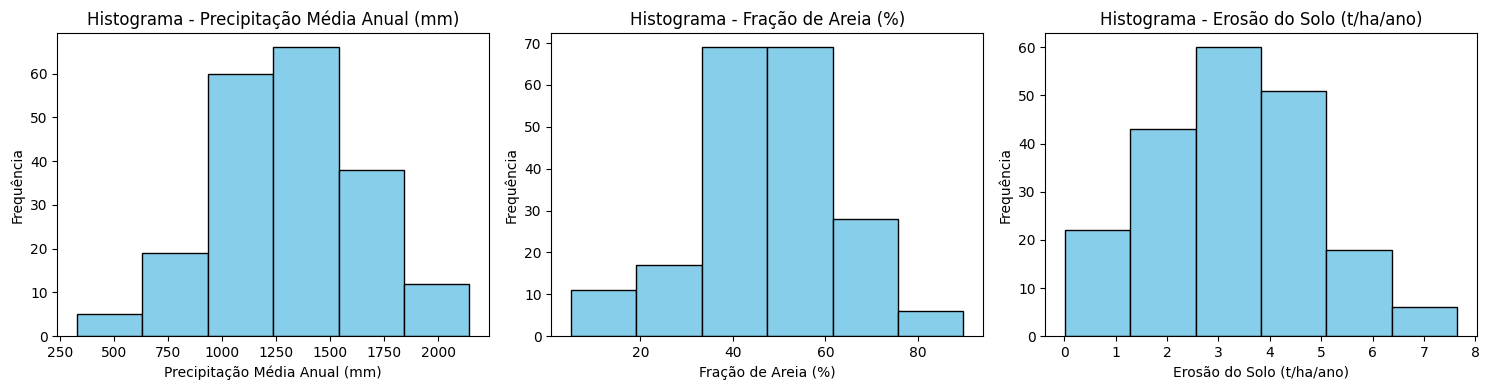

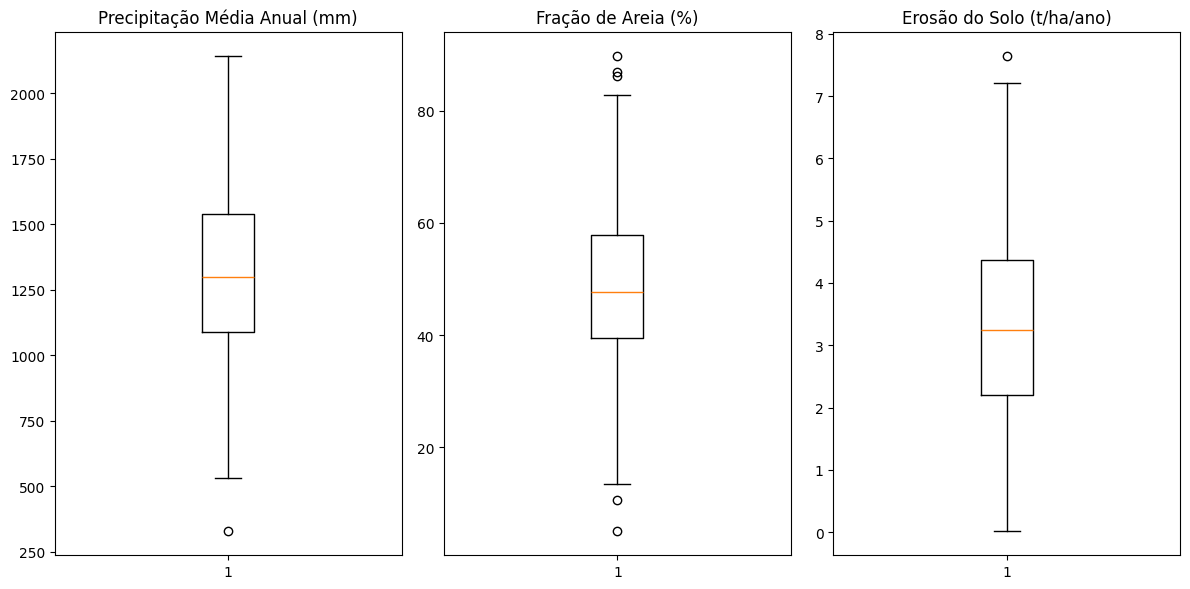

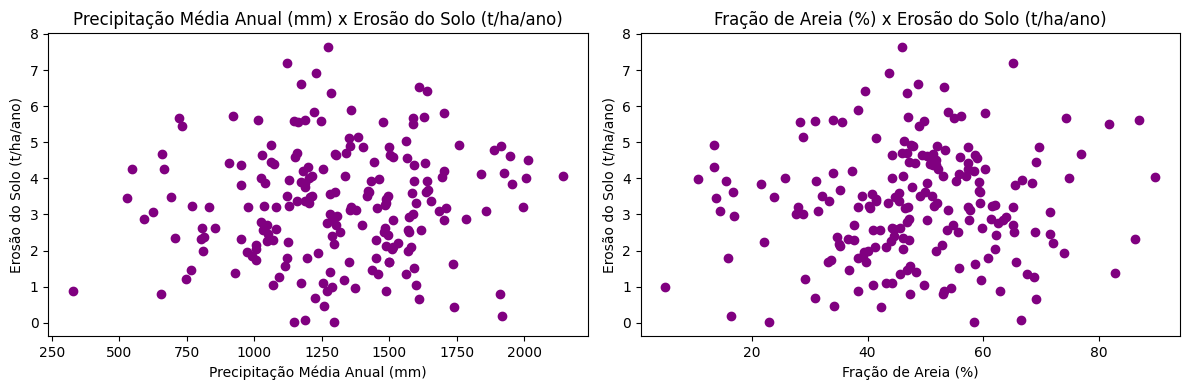

In [88]:
nomes_variaveis = {
    'mean_annual_precip_mm': 'Precipitação Média Anual (mm)',
    'sand_fraction_pct': 'Fração de Areia (%)',
    'soil_erosion_t_per_ha_yr': 'Erosão do Solo (t/ha/ano)'
}

variaveis = ['mean_annual_precip_mm', 'sand_fraction_pct', 'soil_erosion_t_per_ha_yr']

# Histogramas (distribuição das variáveis) - lado a lado
plt.figure(figsize=(15, 4))
for i, var in enumerate(variaveis):
    plt.subplot(1, 3, i+1)
    plt.hist(df[var], bins=6, color='skyblue', edgecolor='black')
    plt.title(f'Histograma - {nomes_variaveis[var]}')
    plt.xlabel(nomes_variaveis[var])
    plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# Boxplots (dispersão e outliers)
plt.figure(figsize=(12, 6))
for i, var in enumerate(variaveis):
    plt.subplot(1, 3, i+1)
    plt.boxplot(df[var])
    plt.title(nomes_variaveis[var])
plt.tight_layout()
plt.show()

# Gráficos de Dispersão (cada variável x Erosão do Solo)
plt.figure(figsize=(12, 4))
for i, var in enumerate(variaveis[:-1]):  # Não incluir erosão como X
    plt.subplot(1, 2, i+1)
    plt.scatter(df[var], df['soil_erosion_t_per_ha_yr'], color='purple')
    plt.xlabel(nomes_variaveis[var])
    plt.ylabel(nomes_variaveis['soil_erosion_t_per_ha_yr'])
    plt.title(f'{nomes_variaveis[var]} x {nomes_variaveis["soil_erosion_t_per_ha_yr"]}')
plt.tight_layout()
plt.show()

#### Matriz da correlação


--- Matriz de Correlação ---
                               Precipitação Média Anual (mm)  \
Precipitação Média Anual (mm)                       1.000000   
Fração de Areia (%)                                -0.156567   
Erosão do Solo (t/ha/ano)                           0.075188   

                               Fração de Areia (%)  Erosão do Solo (t/ha/ano)  
Precipitação Média Anual (mm)            -0.156567                   0.075188  
Fração de Areia (%)                       1.000000                   0.069583  
Erosão do Solo (t/ha/ano)                 0.069583                   1.000000  


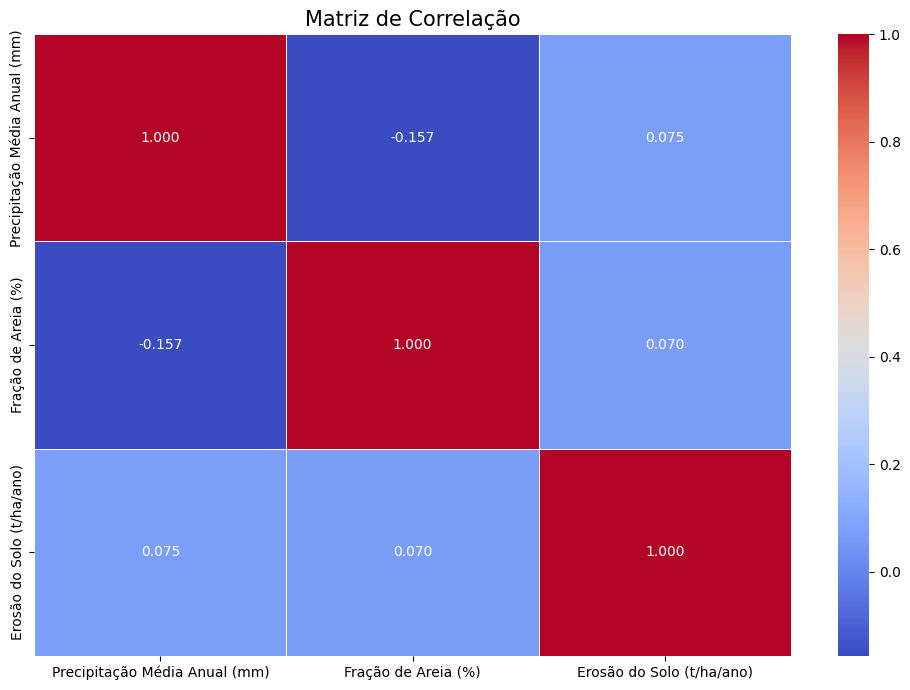

In [89]:
# Dicionário de nomes amigáveis
nomes_variaveis = {
    'mean_annual_precip_mm': 'Precipitação Média Anual (mm)',
    'sand_fraction_pct': 'Fração de Areia (%)',
    'soil_erosion_t_per_ha_yr': 'Erosão do Solo (t/ha/ano)'
}

# Removendo a coluna 'site_id' antes de calcular a correlação
df_para_analise = df.drop('site_id', axis=1)

# Renomeando as colunas para nomes amigáveis
df_para_analise = df_para_analise.rename(columns=nomes_variaveis)

# Calculando a matriz de correlação
matriz_correlacao_corrigida = df_para_analise.corr()

# Exibindo a matriz no console
print("\n--- Matriz de Correlação ---")
print(matriz_correlacao_corrigida)

# Gráfico heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_correlacao_corrigida, 
            annot=True,          # Mostrar valores numéricos
            cmap='coolwarm',     # Mesma paleta de cores da imagem
            fmt=".3f",           # Três casas decimais
            linewidths=0.5)      # Espaço entre os quadrados
plt.title('Matriz de Correlação', fontsize=15)
plt.tight_layout()
plt.show()

#### Regressão Linear


--- Regressão Linear Simples para cada variável ---

Variável: Precipitação Média Anual (mm)
Equação da reta: Erosão = 0.0004 * X + 2.8290
R²: 0.0057


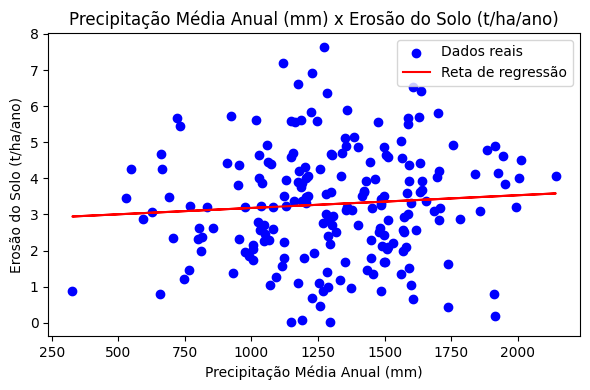


Variável: Fração de Areia (%)
Equação da reta: Erosão = 0.0071 * X + 2.9491
R²: 0.0048


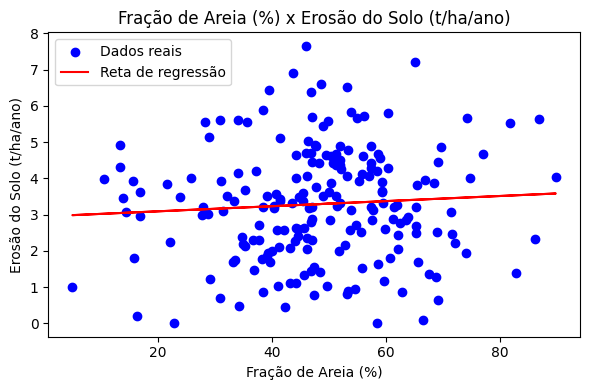

In [90]:
variaveis_explicativas = ['mean_annual_precip_mm', 'sand_fraction_pct']
nomes_variaveis = {
    'mean_annual_precip_mm': 'Precipitação Média Anual (mm)',
    'sand_fraction_pct': 'Fração de Areia (%)',
    'soil_erosion_t_per_ha_yr': 'Erosão do Solo (t/ha/ano)'
}

y = df['soil_erosion_t_per_ha_yr']

print("\n--- Regressão Linear Simples para cada variável ---")
for var in variaveis_explicativas:
    X = df[[var]]  # Transformando em matriz 2D (requisito do sklearn)
    
    # Criando o modelo
    modelo = LinearRegression()
    modelo.fit(X, y)
    
    # Parâmetros para a regressão
    a = modelo.coef_[0]
    b = modelo.intercept_
    r2 = modelo.score(X, y)
    
    # Resultados
    print(f"\nVariável: {nomes_variaveis[var]}")
    print(f"Equação da reta: Erosão = {a:.4f} * X + {b:.4f}")
    print(f"R²: {r2:.4f}")
    
    # Plotando o gráfico da regressão
    plt.figure(figsize=(6, 4))
    plt.scatter(X, y, color='blue', label='Dados reais')
    plt.plot(X, modelo.predict(X), color='red', label='Reta de regressão')
    plt.xlabel(nomes_variaveis[var])
    plt.ylabel(nomes_variaveis['soil_erosion_t_per_ha_yr'])
    plt.title(f'{nomes_variaveis[var]} x {nomes_variaveis["soil_erosion_t_per_ha_yr"]}')
    plt.legend()
    plt.tight_layout()
    plt.show()